In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [4]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## There are null values in 'bmi'


In [6]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
dataset.bmi.replace(to_replace=np.nan, value=dataset.bmi.mean(), inplace=True)

### we replace all null values with mean values of bmi

In [8]:
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Data Visualization

# Count Plot

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


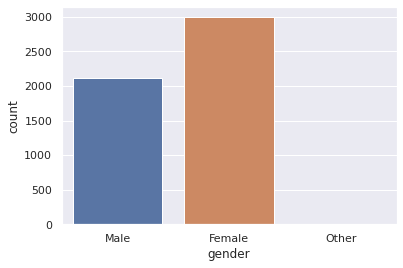

In [10]:
print(dataset.gender.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="gender")
plt.show()

Females are more in our dataset

0    4612
1     498
Name: hypertension, dtype: int64


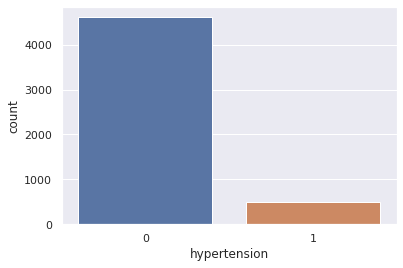

In [11]:
print(dataset.hypertension.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="hypertension")
plt.show()

less people suffer from hypertension

Yes    3353
No     1757
Name: ever_married, dtype: int64


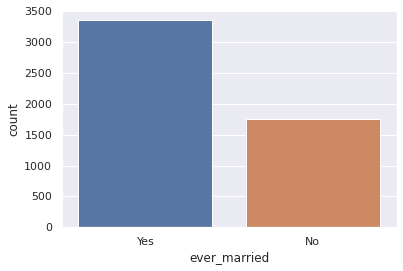

In [12]:
print(dataset.ever_married.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="ever_married")
plt.show()

ratio of people married to not marries is around 2:1

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


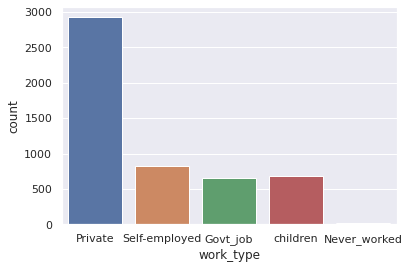

In [13]:
print(dataset.work_type.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="work_type")
plt.show()

A lot of people from our dataset belong to private sector

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


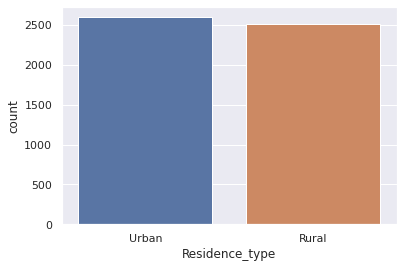

In [14]:
print(dataset.Residence_type.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="Residence_type")
plt.show()

there are almost equal number people living in both the areas


never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


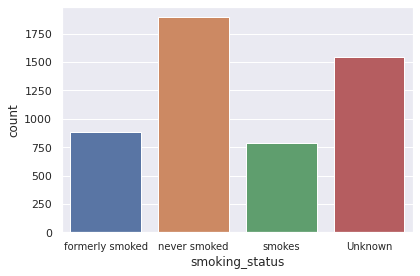

In [15]:
print(dataset.smoking_status.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="smoking_status")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

A lot people have not smoked

0    4861
1     249
Name: stroke, dtype: int64


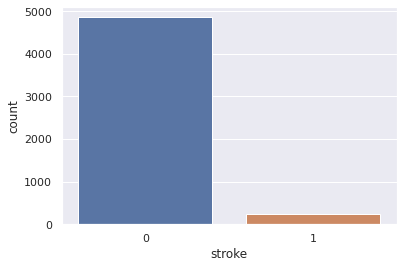

In [16]:
print(dataset.stroke.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="stroke")
plt.show()

From above dependent variable, we have really less peoples who suffered stroke. But, this also means that our dataset is imbalance. We likely have to use sampling techniques to make the data balance.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


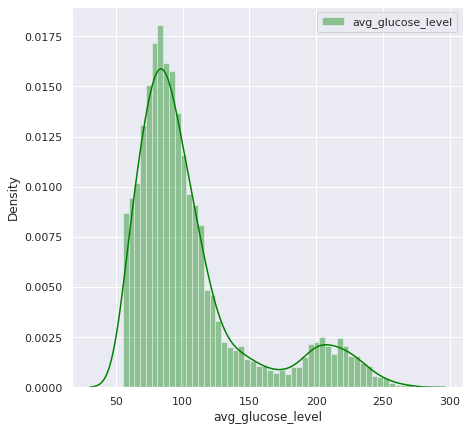

In [17]:
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.avg_glucose_level, color="green", label="avg_glucose_level", kde= True)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


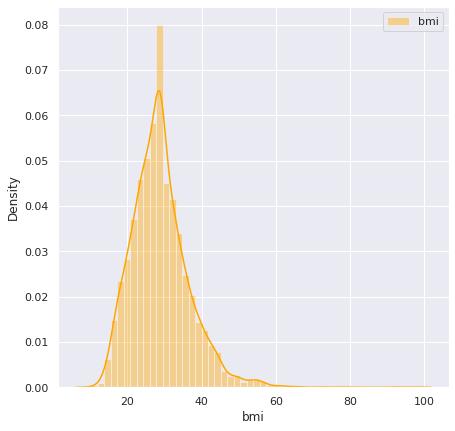

In [18]:
plt.figure(figsize=(7,7))
axe = sns.distplot(dataset.bmi, color="orange", label="bmi", kde= True)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


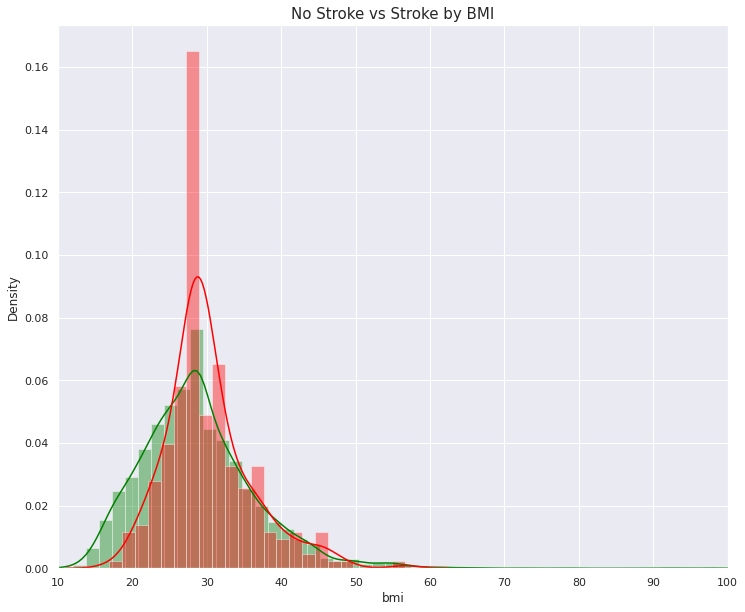

In [19]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["bmi"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["bmi"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,100])
plt.show()


From the graph, it shows that the density of overweight people who suffered a stroke is more.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


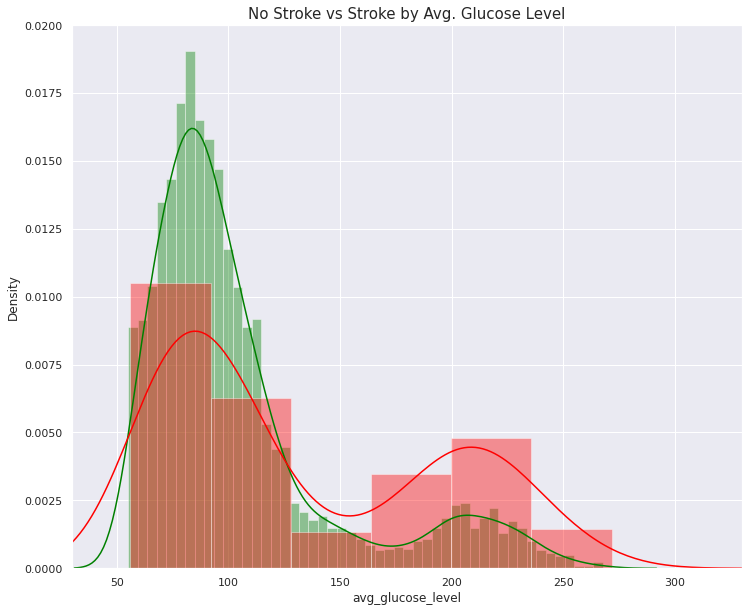

In [20]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=15)
plt.xlim([30,330])
plt.show()

 the density of people having glucose level less than 100 suffered stroke more.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


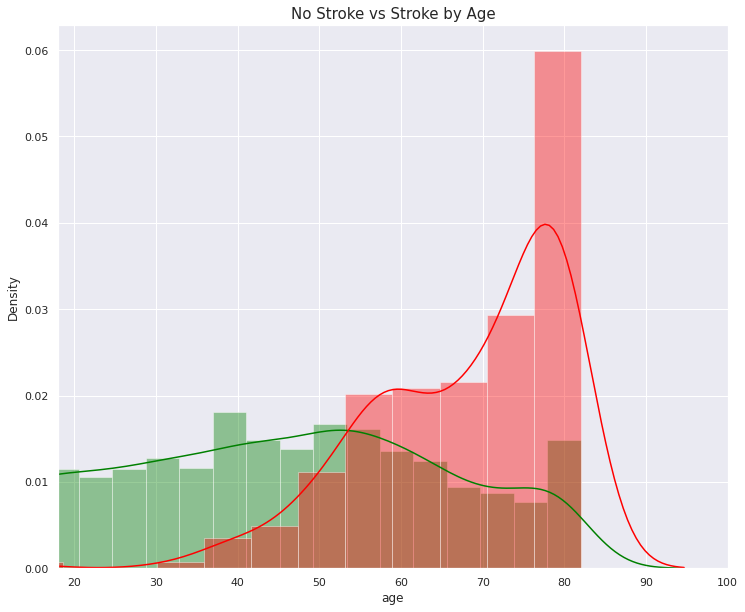

In [21]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["age"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["age"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([18,100])
plt.show()

older people tend to have suffered stroke more

Data PreProcessing

In [22]:
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [23]:
x[0]

array(['Male', 67.0, 0, 1, 'Yes', 'Private', 'Urban', 228.69, 36.6,
       'formerly smoked'], dtype=object)

In [24]:
y[0]

1

**Categorical Encoding :**
'gender' , 'work_type' , 'smoking status'

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [0,5,9])], remainder= 'passthrough')
x = np.array(ct.fit_transform(x))

**Label Encoding :** ever_married , residence_type 

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 15] = le.fit_transform(x[:, 15])
x[:, 16] = le.fit_transform(x[:, 16])

In [27]:
x[0]

array([0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 67.0,
       0, 1, 1, 1, 228.69, 36.6], dtype=object)

In [28]:
print('Shape of X: ', x.shape)
print('Shape of Y: ', y.shape)

Shape of X:  (5110, 19)
Shape of Y:  (5110,)


## Splitting the dataset into the Training set and Test set 

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [30]:
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (4088, 19)
Number transactions y_train dataset:  (4088,)
Number transactions x_test dataset:  (1022, 19)
Number transactions y_test dataset:  (1022,)


## Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [34]:
x_train[0]

array([ 0.83653577, -0.8361134 , -0.01564219, -0.39261966, -0.05862104,
        0.87209589, -0.43799171, -0.39344918, -0.65564517,  2.17751533,
       -0.76532697, -0.42963261, -0.32824306, -0.33206349, -0.23963241,
        0.71855443, -1.02026398, -0.86023092,  0.99513416])

## Handling Imbalance data using SMOTE 

In [36]:
from imblearn.over_sampling import SMOTE

In [40]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE()
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 195
Before OverSampling, counts of label '0': 3893 

After OverSampling, the shape of train_X: (7786, 19)
After OverSampling, the shape of train_y: (7786,) 

After OverSampling, counts of label '1': 3893
After OverSampling, counts of label '0': 3893
